### CNN(Y-Network)

In [1]:
# cnn y-net : multi input CNN

import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from tensorflow.keras.layers import concatenate
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]

x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
input_shape = (image_size, image_size, 1)
#                   28          28

batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

In [5]:
# left branch

left_inputs = Input(shape=input_shape)

x = left_inputs
filters = n_filters

for i in range(3):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

In [6]:
# right branch

right_inputs = Input(shape=input_shape)

y = right_inputs
filters = n_filters

for i in range(3):
    y = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu',
               dilation_rate=2)(y)  # 커널의 간격
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2

In [7]:
# left, right 결합

y = concatenate([x, y])

y = Flatten()(y)
y = Dropout(dropout)(y)

outputs = Dense(num_labels, activation='softmax')(y)

# input에 2개의 데이터가 전달됨
model = Model([left_inputs, right_inputs], outputs)
#                       input              output

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                              

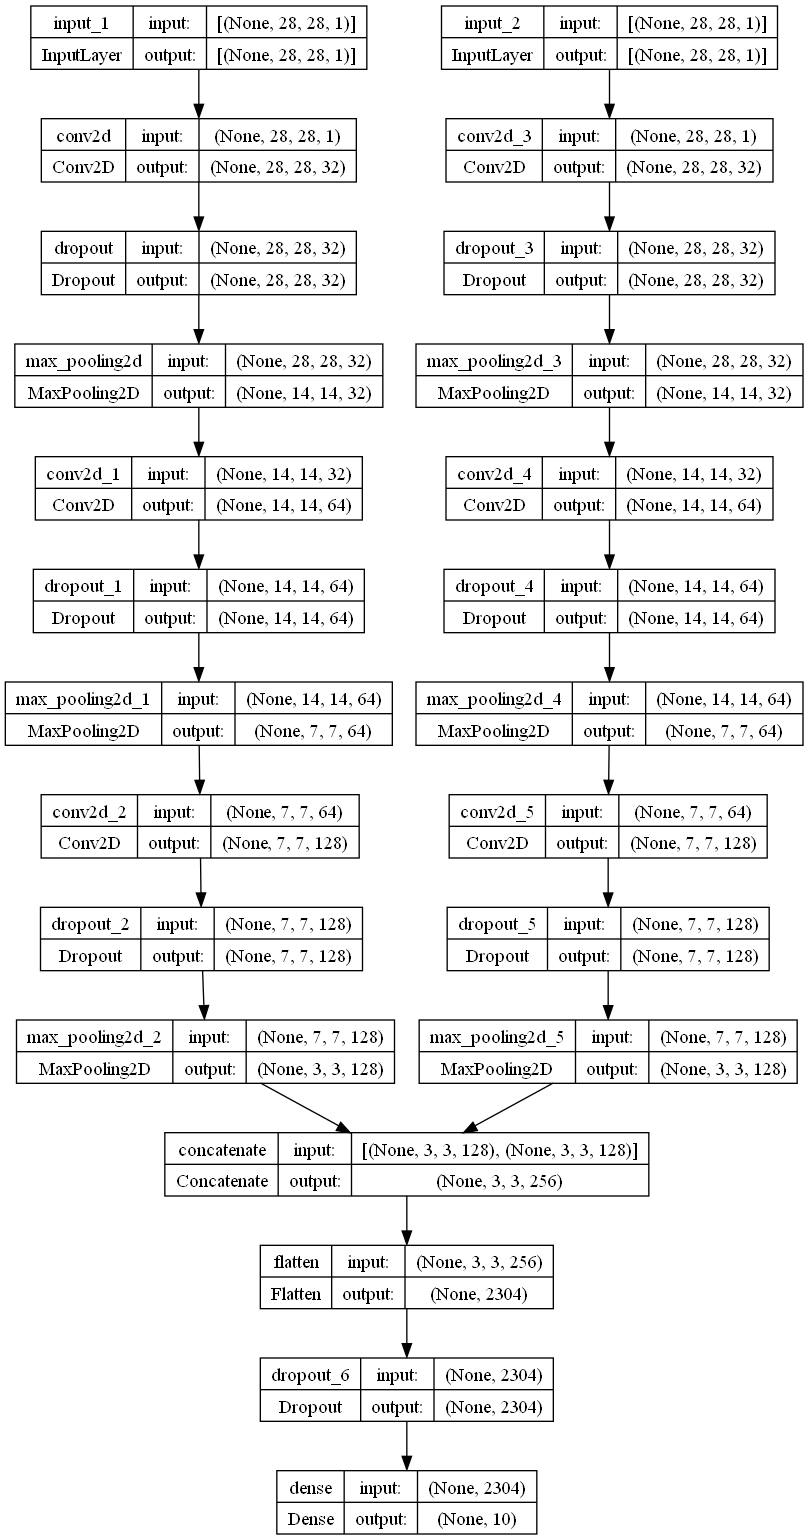

In [8]:
plot_model(model, to_file='cnn-y-network.png', show_shapes=True)

In [9]:
model.fit([x_train, x_train],
          y_train,
          validation_data=([x_test, x_test], y_test),
          epochs=2,
          batch_size=batch_size)

Epoch 1/2
1875/1875 [==============================] - 33s 16ms/step - loss: 0.1716 - accuracy: 0.9464 - val_loss: 0.1610 - val_accuracy: 0.9834
Epoch 2/2
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0786 - val_accuracy: 0.9912


In [10]:
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0786 - accuracy: 0.9912

Test accuracy: 99.1%
